# Лабораторная работа № 2. Методы классификации данных

## Выполнил: Кремлев Антон Алексеевич

## Учебная группа: 18ивт2



## 7 Вариант

## 	Набор данных: 1 ( mushrooms )
##  Классификаторы:
### 2 – классификатор K ближайших соседей (задаётся радиус для выбора ближайших объектов);
### 3 – линейный классификатор (персептрон);


### 1.	Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных (включить полученные описания в отчёт).



#### - 1.cap-shape: форма шляпки
#### - 2.cap-surface: поверхность шляпки
#### - 3.cap-color: цвет шляпки
#### - 4.bruises: синяки?( веротяно пятна ) 
#### - 5.odor: запах
#### - 6.gill-attachment: прикрепления к жабрам
#### - 7.gill-spacing: расстояние между жабер
#### - 8.gill-size: размер жабер
#### - 9.gill-color: цвет жабер
#### - 10.stalk-shape: форма ножки
#### - 11.stalk-root: корень
#### - 12.stalk-surface-above-ring: форма ножки над юбкой
#### - 13.stalk-surface-below-ring: форма ножки под юбкой
#### - 14.stalk-color-above-ring: цвет ножки над юбкой
#### - 15.stalk-color-below-ring: цвет ножки под юбкой
#### - 16.veil-type: тип юбки
#### - 17.veil-color: цвет юбки
#### - 18.ring-number: количество колец
#### - 19.ring-type: тип кольца
#### - 20.spore-print-color: цвет спор
#### - 21.population: популяция
#### - 22.habitat: среда обитания

### 2.	Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("lb/лб2_классификация/1_mushrooms/mushrooms.csv")

In [3]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
len1 = len(df)
df.drop_duplicates(keep='first',inplace=True)
len2 = len(df)
print("Всего удалено дубликатов" ,len1 - len2)

Всего удалено дубликатов 0


In [5]:
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


### 3.	Оцените сбалансированность данных по классам (постройте гистограмму). Используйте полученную информацию при выборе метрики оценки качества классификации (PR или ROC кривая)

In [6]:
import seaborn as sns

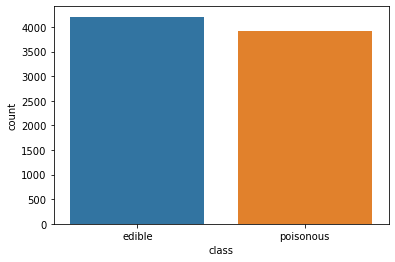

In [7]:
sns.barplot(data=pd.DataFrame({
    'count': [len(df.loc[df["class"] == 'e']),
              len(df.loc[df["class"] == 'p']),],
    'class': ['edible','poisonous'],}),
     y='count', x='class')


##### Вывод: Классы сбалонсированы

### 4.	Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию);

##### Невозможно выполнить масштабирование количественных признаков данного набора, так как их в нем нет

### 5.	Выполните замену категориальных признаков; выберите и обоснуйте способ замены;

In [8]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

for column in list(df):
    ### используем fit_transform, а не OneHotEncoder потому что у нас и так очень много параметров
    df[column] = pd.Series(label_encoder.fit_transform(df[column]))
### посмотрим результат 
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


#### В нашем датафрейме атрибуты -текстовые . Мы не можем использовать текст в данных для обучения модели. Поэтому, прежде чем мы сможем начать процесс, нам нужно эти данные подготовить.

### 6.	Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других (удалять признаки нужно только для линейных методов классификации);

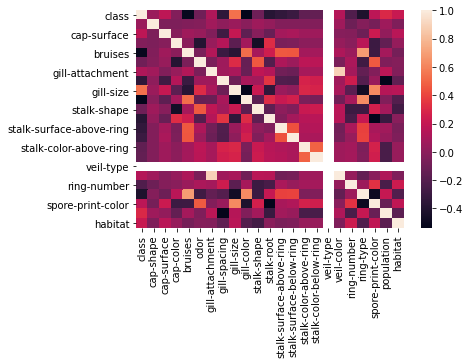

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

sns.heatmap(df.corr())

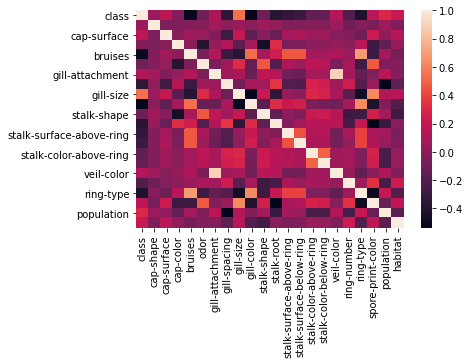

In [10]:
#заметим что veil-type коррелируют с наибольшим числом других признаков - удалим его 
df = df.drop(columns='veil-type')
sns.heatmap(df.corr())

### 7.	Заполните пропущенные значения в данных;

In [11]:
df.count()

class                       8124
cap-shape                   8124
cap-surface                 8124
cap-color                   8124
bruises                     8124
odor                        8124
gill-attachment             8124
gill-spacing                8124
gill-size                   8124
gill-color                  8124
stalk-shape                 8124
stalk-root                  8124
stalk-surface-above-ring    8124
stalk-surface-below-ring    8124
stalk-color-above-ring      8124
stalk-color-below-ring      8124
veil-color                  8124
ring-number                 8124
ring-type                   8124
spore-print-color           8124
population                  8124
habitat                     8124
dtype: int64

##### нет пропусков 

### 8.	Решите поставленную задачу классификации в соответствии с заданием. При подборе параметров классификатора используйте метод GridSearchCV и перекрёстную проверку (изучите возможные для изменения параметры классификации). Определите схему построения многоклассового классификатора, используемую по умолчанию (опишите используемую схему кодирования, обоснуйте свой выбор). Постройте, если это возможно, многоклассовую классификацию на основе схем «один-против-всех» и «все-против-всех». Оцените точность классификации для каждой их схем. Постройте кривые PR и ROC (для каждого из классов должны быть построены отдельные кривые, а также кривые для микро и макроусреднения метрик качества). Для линейного классификатора используйте регуляризацию. 

#### классификатор K ближайших соседей (задаётся радиус для выбора ближайших объектов);

In [38]:
###
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Perceptron
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
###
from sklearn.metrics import accuracy_score, precision_recall_curve, average_precision_score, roc_curve, auc
###
X_data, Y_data = df.drop(columns="class", axis=1).values, df["class"].values
X_train, X_test, y_train, y_test = train_test_split(X_data, Y_data, test_size=.3)

In [106]:
clf = OneVsRestClassifier(LinearSVC(random_state=0))
y_score = clf.fit(X_train, y_train).decision_function(X_test)

rnc = RadiusNeighborsClassifier()
rnc.get_params()
params = {'radius': np.linspace(4, 6, 40),
          'weights': ['uniform', 'distance']}



In [109]:
rnc_grid = GridSearchCV(rnc, params)
rnc_grid.fit(X_train, y_train)



GridSearchCV(cv=None, error_score=nan,
             estimator=RadiusNeighborsClassifier(algorithm='auto', leaf_size=30,
                                                 metric='minkowski',
                                                 metric_params=None,
                                                 n_jobs=None,
                                                 outlier_label=None, p=2,
                                                 radius=1.0,
                                                 weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'radius': array([4.        , 4.05128205, 4.1025641 , 4.15384615, 4.20512821,
       4.25641026, 4.30769231, 4.35897436, 4.410256...
       4.76923077, 4.82051282, 4.87179487, 4.92307692, 4.97435897,
       5.02564103, 5.07692308, 5.12820513, 5.17948718, 5.23076923,
       5.28205128, 5.33333333, 5.38461538, 5.43589744, 5.48717949,
       5.53846154, 5.58974359, 5.64102564, 5.69230769, 5.74358974,
       

In [116]:
r = rnc_grid.best_estimator_.radius_neighbors

rnc = RadiusNeighborsClassifier(4)
rnc.fit(X_train, y_train)

y_score = rnc.predict(X_test)

print('Accuracy of rnc: %.7f'%(accuracy_score(y_test, y_score)))
print('Best: %.7f'%(rnc_grid.best_score_))

Accuracy of rnc: 0.9762100
Best: 0.9873362


### Линейный классификатор (Персептрон)

In [141]:
from sklearn.linear_model import Perceptron

In [148]:
import warnings
warnings.simplefilter('ignore')
ppn = Perceptron()
ppn_params = {'alpha': np.linspace(0, 1, 30),
              'max_iter': [x for x in range(1, 60)]}
print(ppn_params)

{'alpha': array([0.        , 0.03448276, 0.06896552, 0.10344828, 0.13793103,
       0.17241379, 0.20689655, 0.24137931, 0.27586207, 0.31034483,
       0.34482759, 0.37931034, 0.4137931 , 0.44827586, 0.48275862,
       0.51724138, 0.55172414, 0.5862069 , 0.62068966, 0.65517241,
       0.68965517, 0.72413793, 0.75862069, 0.79310345, 0.82758621,
       0.86206897, 0.89655172, 0.93103448, 0.96551724, 1.        ]), 'max_iter': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]}


In [149]:
ppn_grid = GridSearchCV(estimator=ppn, 
                        param_grid=ppn_params) 
ppn_grid.fit(X_train, y_train)

#find best alpha,iter from Grid net
alpha = ppn_grid.best_estimator_.alpha
max_iter = ppn_grid.best_estimator_.max_iter

ppn = Perceptron(alpha = alpha, 
                 max_iter = max_iter)
ppn.fit(X_train, y_train)
y_score = ppn.predict(X_test)

print('Accuracy of ppn: %.7f'%(accuracy_score(y_test, y_score)))
print('Best: %.7f'%(ppn_grid.best_score_))

Accuracy of ppn: 0.6718622
Best: 0.9342210


In [26]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import average_precision_score

In [151]:
prob_ppn = CalibratedClassifierCV(ppn).fit(X_train, y_train).predict_proba(X_test)
prob_rnc = rnc.predict_proba(X_test)


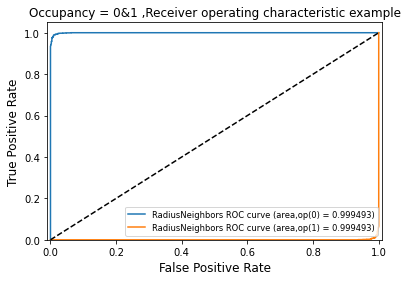

In [201]:

class plots():
    def addRoc(self, prob, name, test):
        #probas_predarray, shape = [n_samples]
        #Estimated probabilities or decision function.
        tpr, fpr, thresholds = roc_curve(test, prob[:, 0])
        roc_auc  = auc(fpr, tpr)
        plt.plot(fpr, tpr, label='%s ROC curve (area,op(0) = %f)' % (name, roc_auc))
        tpr1, fpr1, thresholds = roc_curve(test, prob[:, 1])
        roc_auc1  = auc(fpr1, tpr1)
        plt.plot(fpr1, tpr1, label='%s ROC curve (area,op(1) = %f)' % (name, roc_auc))
        
    def addPr(self, prob, occupancy, name, test):
        #in precision_recall_curve we can use int tmp, lets use it
        precision, recall, _ = precision_recall_curve(test, prob[:, occupancy])
        aps = average_precision_score(test, prob[:, occupancy])
        plt.plot(recall, precision, label='%s PR (area, = %f)' % (name, aps))
        
#create few ojbect to draw different roc * pr plots        
rnc_roc = plots()
rnc_pr = plots()
ppn_pr = plots()
ppn_roc = plots()
rnc_roc.addRoc(prob_rnc, 'RadiusNeighbors', y_test)

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.01, 1.01])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize='large')
plt.ylabel('True Positive Rate', fontsize='large')
plt.legend(loc=4, fontsize='small')
plt.title('Occupancy = 0&1 ,Receiver operating characteristic' )
plt.show()

In [ ]:
rnc_roc.addRoc(prob_rnc, 'RadiusNeighbors', y_test)


plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.01, 1.01])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize='large')
plt.ylabel('True Positive Rate', fontsize='large')
plt.legend(loc=4, fontsize='small')
plt.title('Occupancy = 0&1 ,Receiver operating characteristic' )
plt.show()

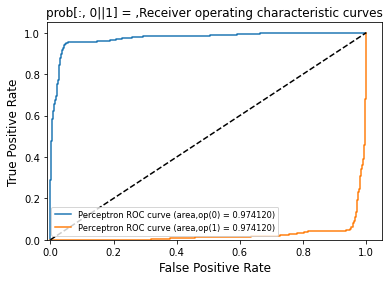

In [206]:

rnc_roc.addRoc(prob_ppn, 'Perceptron', y_test)


plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.01, 1.05])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize='large')
plt.ylabel('True Positive Rate', fontsize='large')
plt.legend(loc=3, fontsize='small')
plt.title('prob[:, 0||1] = ,Receiver operating characteristic curves')
plt.show()

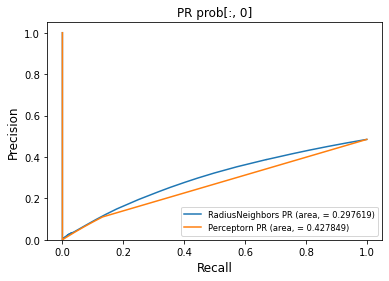

In [207]:
rnc_roc.addPr(prob_ppn, 0, 'RadiusNeighbors', y_test)
rnc_roc.addPr(prob_rnc, 0, 'Perceptorn', y_test)



plt.xlim([-0.05, 1.05])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall', fontsize='large')
plt.ylabel('Precision', fontsize='large')
plt.legend(loc=4, fontsize='small')
plt.title('PR prob[:, 0]')
plt.show()

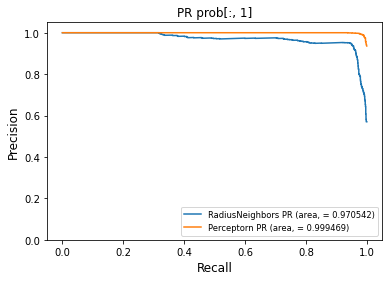

In [208]:
rnc_roc.addPr(prob_ppn, 1, 'RadiusNeighbors', y_test)
rnc_roc.addPr(prob_rnc, 1, 'Perceptorn', y_test)



plt.xlim([-0.05, 1.05])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall', fontsize='large')
plt.ylabel('Precision', fontsize='large')
plt.legend(loc=4, fontsize='small')
plt.title('PR prob[:, 1]')
plt.show()

### 9. Сравните кривые для калассификаторов, сделайте вывод
#### Классификатор RadiusNeighbors показал себя эффективнее